In [1]:
from numpy import log, sqrt, exp
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def cal_call_delta(S, K, T, r, q, v):
    
    sqrtT = sqrt(T)
    ert = exp(-r*T)
    eqt = exp(-q*T)

    d1 = (log(S/K) + (r-q+0.5*v**2)*T) / (v*sqrtT)
    d2 = d1 - v*sqrtT
    nd1 = norm.cdf(d1)
    nd2 = norm.cdf(d2)
    neg_nd1 = norm.cdf(-d1)
    neg_nd2 = norm.cdf(-d2)
    der_nd1 = norm.pdf(d1)

    c = S*nd1*eqt - K*nd2*ert
    delta = eqt*nd1
    return c, delta

def cal_digit_delta(S, K, T, r, q, v):
    
    sqrtT = sqrt(T)
    ert = exp(-r*T)
    eqt = exp(-q*T)

    d1 = (log(S/K) + (r-q+0.5*v**2)*T) / (v*sqrtT)
    d2 = d1 - v*sqrtT
    nd1 = norm.cdf(d1)
    nd2 = norm.cdf(d2)
    neg_nd1 = norm.cdf(-d1)
    neg_nd2 = norm.cdf(-d2)
    der_nd1 = norm.pdf(d1)

    c = nd2*ert
    delta = norm.pdf(d1)*ert /(v*S*sqrtT)
    return c, delta

In [3]:
S = np.linspace(95,105,1001)
K = 100
T = 0.25
r = 0
q = 0
v = 0.2

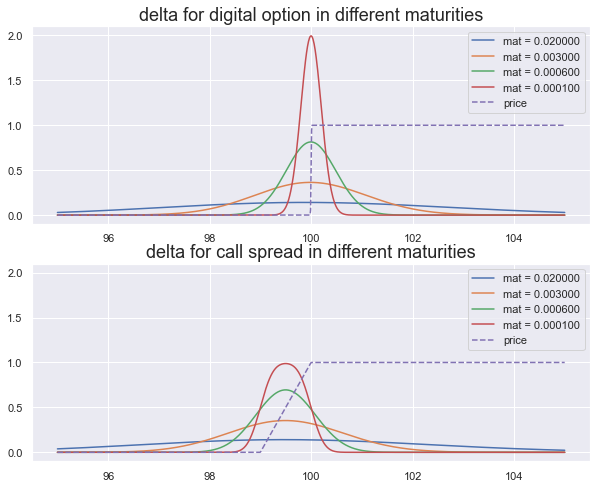

In [4]:
fig, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

for T in [0.02, 0.003, 0.0006, 0.0001]:
    delta = cal_digit_delta(S, K, T, r, q, v)[1]
    ax1.plot(S, delta, label=f"mat = {T:f}")
    
price = cal_digit_delta(S, K, 0.0000001, r, q, v)[0]
ax1.plot(S, price, label=f"price", linestyle="--")
ax1.set_title("delta for digital option in different maturities", size = 18)
ax1.set_ylim(-0.1,2.1)
ax1.legend()



for T in [0.02, 0.003, 0.0006, 0.0001]:
    delta = -cal_call_delta(S, K, T, r, q, v)[1] + cal_call_delta(S, K-1, T, r, q, v)[1]
    ax2.plot(S, delta, label=f"mat = {T:f}")
    
price = -cal_call_delta(S, K, 0.0000001, r, q, v)[0] + cal_call_delta(S, K-1, 0.0000001, r, q, v)[0]
ax2.plot(S, price, label=f"price", linestyle="--")
ax2.set_title("delta for call spread in different maturities", size = 18)
ax2.set_ylim(-0.1,2.1)
ax2.legend()